In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-urls/phishing_site_urls.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/phishing-urls/phishing_site_urls.csv')

In [5]:
data

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [6]:
data.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [8]:
data.URL

0         nobell.it/70ffb52d079109dca5664cce6f317373782/...
1         www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2         serviciosbys.com/paypal.cgi.bin.get-into.herf....
3         mail.printakid.com/www.online.americanexpress....
4         thewhiskeydregs.com/wp-content/themes/widescre...
                                ...                        
549341                                      23.227.196.215/
549342                                   apple-checker.org/
549343                                    apple-iclods.org/
549344                                   apple-uptoday.org/
549345                                    apple-search.info
Name: URL, Length: 549346, dtype: object

In [9]:
data['Label'].value_counts()


Label
good    392924
bad     156422
Name: count, dtype: int64

In [10]:
len(data)

549346

In [11]:
data.isna().sum()

URL      0
Label    0
dtype: int64

<Axes: xlabel='Label'>

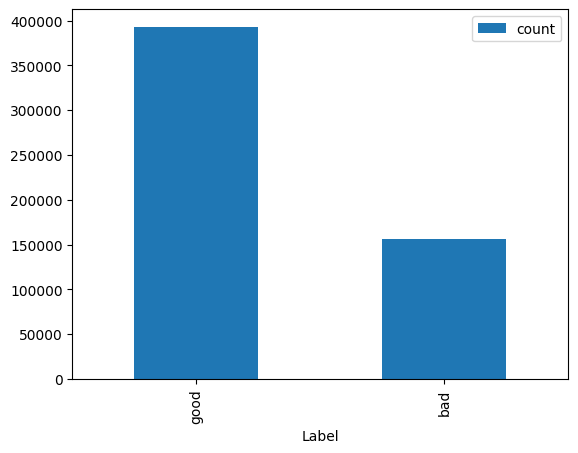

In [12]:
barp = pd.DataFrame(data['Label'].value_counts())
barp.plot(kind='bar')

In [13]:
df = data.copy()


# Data Analysis


In [14]:
from urllib.parse import urlparse, parse_qs

def tokenize_url(url):
    # Parsing the URL
    parsed_url = urlparse(url)
    
    # Tokenize the components of the URL
    protocol = parsed_url.scheme
    domain = parsed_url.netloc
    path = parsed_url.path
    query_params = parse_qs(parsed_url.query)  # Parse query parameters
    
    return protocol, domain, path, query_params

df[['Protocol', 'Domain', 'Path', 'Query_Params']] = pd.DataFrame(df['URL'].apply(tokenize_url).tolist())
print(df)

                                                      URL Label Protocol  \
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad            
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad            
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad            
3       mail.printakid.com/www.online.americanexpress....   bad            
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad            
...                                                   ...   ...      ...   
549341                                    23.227.196.215/   bad            
549342                                 apple-checker.org/   bad            
549343                                  apple-iclods.org/   bad            
549344                                 apple-uptoday.org/   bad            
549345                                  apple-search.info   bad            

       Domain                                               Path  \
0              nobe

In [16]:
df

,URL,Label,Protocol,Domain,Path,Query_Params
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,,,nobell.it/70ffb52d079109dca5664cce6f317373782/...,"{'cmd': ['_profile-ach'], 'outdated_page_tmpl'..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,,,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,{}
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,,,serviciosbys.com/paypal.cgi.bin.get-into.herf....,{}
3,mail.printakid.com/www.online.americanexpress....,bad,,,mail.printakid.com/www.online.americanexpress....,{}
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,,,thewhiskeydregs.com/wp-content/themes/widescre...,{}
...,...,...,...,...,...,...
549341,23.227.196.215/,bad,,,23.227.196.215/,{}
549342,apple-checker.org/,bad,,,apple-checker.org/,{}
549343,apple-iclods.org/,bad,,,apple-iclods.org/,{}
549344,apple-uptoday.org/,bad,,,apple-uptoday.org/,{}


In [17]:
df['Protocol'].isna().sum()

0

In [18]:
df[df != ''].any()


URL             True
Label           True
Protocol        True
Domain          True
Path            True
Query_Params    True
dtype: bool

In [19]:
empty_strings = df[df['Protocol'].str.strip() == '']

In [20]:
len(df['Protocol'].unique())

1168

In [21]:
empty_strings

,URL,Label,Protocol,Domain,Path,Query_Params
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,,,nobell.it/70ffb52d079109dca5664cce6f317373782/...,"{'cmd': ['_profile-ach'], 'outdated_page_tmpl'..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,,,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,{}
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,,,serviciosbys.com/paypal.cgi.bin.get-into.herf....,{}
3,mail.printakid.com/www.online.americanexpress....,bad,,,mail.printakid.com/www.online.americanexpress....,{}
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,,,thewhiskeydregs.com/wp-content/themes/widescre...,{}
...,...,...,...,...,...,...
549341,23.227.196.215/,bad,,,23.227.196.215/,{}
549342,apple-checker.org/,bad,,,apple-checker.org/,{}
549343,apple-iclods.org/,bad,,,apple-iclods.org/,{}
549344,apple-uptoday.org/,bad,,,apple-uptoday.org/,{}


In [22]:
from urllib.parse import urlparse

url = "www.dghjdgf.com/paypal.co.uk/cycgi-bin/"

# Prepend "http://" to the URL if it doesn't already have a scheme
if not url.startswith(('http://', 'https://')):
    url = 'http://' + url

parsed_url = urlparse(url)

print("Scheme:", parsed_url.scheme)  # Output: 'http'
print("Netloc:", parsed_url.netloc)  # Output: 'www.dghjdgf.com'
print("Path:", parsed_url.path)      # Output: '/paypal.co.uk/cycgi-bin/'
print("Params:", parsed_url.params)  # Output: '' (no parameters provided)
print("Query:", parsed_url.query)    # Output: '' (no query parameters provided)
print("Fragment:", parsed_url.fragment)  # Output: '' (no fragment provided)


Scheme: http
Netloc: www.dghjdgf.com
Path: /paypal.co.uk/cycgi-bin/
Params: 
Query: 
Fragment: 


In [23]:
# 1. URL Length
df['URL_Length'] = data['URL'].apply(len)

# 2. Presence of Special Characters
special_characters = ['-', '_', '/', '.', ':']
df['Has_Special_Characters'] = data['URL'].apply(lambda x: any(char in x for char in special_characters))

# 3. Domain Length
df['Domain_Length'] = data['URL'].apply(lambda x: x.split('/')[0].count('.'))

# 4. Count of Subdomains
df['Subdomain_Count'] = data['URL'].apply(lambda x: x.split('/')[0].count('.') - 1)

# 5. Presence of Keywords
keywords = ['phishing', 'malware', 'login', 'bank', 'paypal']
df['Has_Keywords'] = data['URL'].apply(lambda x: any(keyword in x for keyword in keywords))


In [24]:
# 6. URL Composition
url_structures = data['URL'].apply(urlparse)
df['Scheme'] = url_structures.apply(lambda x: x.scheme if x.scheme else 'http')
df['Netloc'] = url_structures.apply(lambda x: x.netloc)
df['Path'] = url_structures.apply(lambda x: x.path)
df['Query'] = url_structures.apply(lambda x: x.query)
df['Fragment'] = url_structures.apply(lambda x: x.fragment)


In [25]:
df.columns

Index(['URL', 'Label', 'Protocol', 'Domain', 'Path', 'Query_Params',
       'URL_Length', 'Has_Special_Characters', 'Domain_Length',
       'Subdomain_Count', 'Has_Keywords', 'Scheme', 'Netloc', 'Query',
       'Fragment'],
      dtype='object')

In [26]:
df

,URL,Label,Protocol,Domain,Path,Query_Params,URL_Length,Has_Special_Characters,Domain_Length,Subdomain_Count,Has_Keywords,Scheme,Netloc,Query,Fragment
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,,,nobell.it/70ffb52d079109dca5664cce6f317373782/...,"{'cmd': ['_profile-ach'], 'outdated_page_tmpl'...",225,True,1,0,True,http,,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,,,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,{},81,True,2,1,True,http,,,
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,,,serviciosbys.com/paypal.cgi.bin.get-into.herf....,{},177,True,1,0,True,http,,,
3,mail.printakid.com/www.online.americanexpress....,bad,,,mail.printakid.com/www.online.americanexpress....,{},60,True,2,1,False,http,,,
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,,,thewhiskeydregs.com/wp-content/themes/widescre...,{},116,True,1,0,False,http,,84784787824HDJNDJDSJSHD//2724782784/,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,,,23.227.196.215/,{},15,True,3,2,False,http,,,
549342,apple-checker.org/,bad,,,apple-checker.org/,{},18,True,1,0,False,http,,,
549343,apple-iclods.org/,bad,,,apple-iclods.org/,{},17,True,1,0,False,http,,,
549344,apple-uptoday.org/,bad,,,apple-uptoday.org/,{},18,True,1,0,False,http,,,


In [27]:
http_good_urls = df[(df['Scheme'] == 'http') & (df['Label'] == 'good')]
http_good_urls


,URL,Label,Protocol,Domain,Path,Query_Params,URL_Length,Has_Special_Characters,Domain_Length,Subdomain_Count,Has_Keywords,Scheme,Netloc,Query,Fragment
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,,,esxcc.com/js/index.htm,{},571,True,1,0,False,http,,us.battle.net/noghn/en/?ref5M+9d'bbws&b`|tNEfn...,àÐØ}Ú ¨%¡x(My¼RçÁs²¹ù#Õ¦kIçzbTUùØ9ÂEm...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,,,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuËÓ6(r...,{},352,True,0,-1,False,http,,,'3ø@CÄRõ²çÇÝ®ö QBÇÆg`Èå Zéê D îÂm®ÎÝQó...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,,,'www.institutocgr.coo/web/media/syqvem/dk-óij...,{'l pýl ÖÒ %ÓaéþùkzHü]z?¹¯úT£bùÙî¬©àæÌ...,337,True,2,1,False,http,,l pýl ÖÒ %ÓaéþùkzHü]z?¹¯úT£bùÙî¬©àæÌì*...,
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,,,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à,{},33,True,0,-1,False,http,,,
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,,,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,{},316,True,1,0,False,http,,Já¥`Ó`¤µ÷ïvºbsÔÉ¦§+»ó¼:Uÿ5kPÚG9àYàkÕ_...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483590,youthleaguesusa.com/potomacsoccer/2011/Tournam...,good,,,youthleaguesusa.com/potomacsoccer/2011/Tournam...,{},54,True,1,0,False,http,,,
483591,zip-codes.com/,good,,,zip-codes.com/,{},14,True,1,0,False,http,,,
483592,owens.edu/news-releases/?p=2052,good,,,owens.edu/news-releases/,{'p': ['2052']},31,True,1,0,False,http,,p=2052,
483593,1.safesecureweb.com/egale/index.asp?item=1173,good,,,1.safesecureweb.com/egale/index.asp,{'item': ['1173']},45,True,2,1,False,http,,item=1173,


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

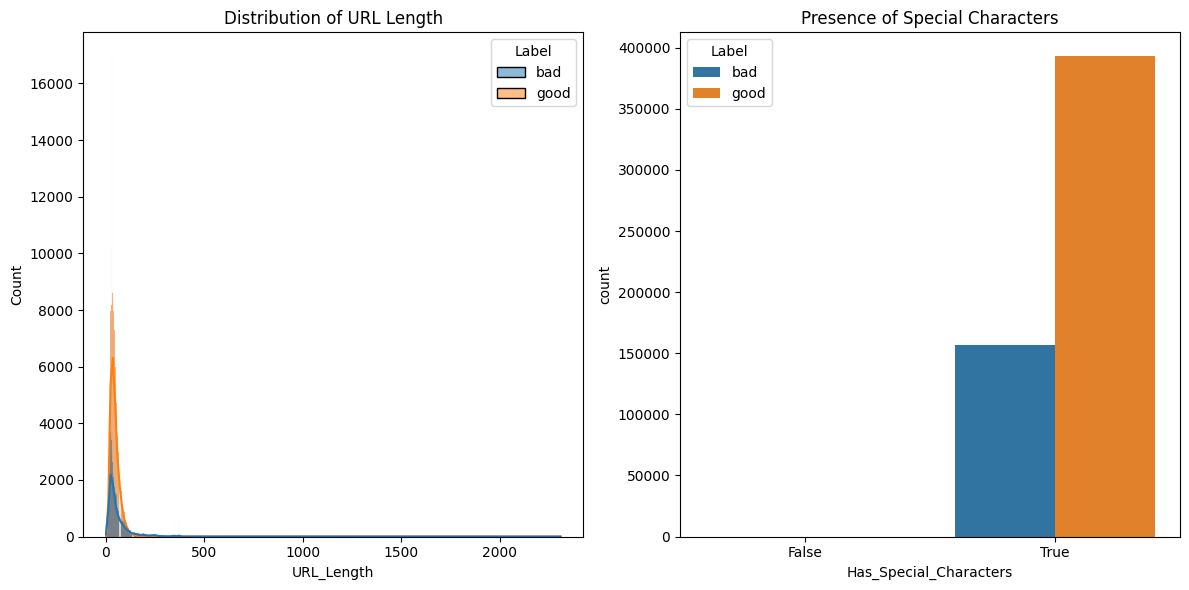

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)

# Plot URL Length distribution
sns.histplot(data=df, x='URL_Length', hue='Label', kde=True, ax=axes[0])
axes[0].set_title('Distribution of URL Length')

# Plot Presence of Special Characters distribution
sns.countplot(data=df, x='Has_Special_Characters', hue='Label', ax=axes[1])
axes[1].set_title('Presence of Special Characters')

# Show the plots
plt.tight_layout()
plt.show()


In [29]:
bad_urls_with_no_special_chars = df[(df['Label'] == 'bad') & (df['Has_Special_Characters'] == False)]
print(len(bad_urls_with_no_special_chars))

45


In [30]:
good_urls_with_no_special_chars = df[(df['Label'] == 'good') & (df['Has_Special_Characters'] == False)]
print(len(good_urls_with_no_special_chars))

34


Point-biserial correlation is a measure of the strength and direction of association between a binary variable (such as presence or absence of a characteristic) and a continuous variable. 
****
'point_biserial_correlation' represents the point-biserial correlation coefficient between the binary feature 'Has_Special_Characters' and the target variable 'Label' (phishing vs. legitimate URLs). It indicates how strongly the presence of special characters in the URL is associated with phishing URLs.
****

In [31]:
# Map string labels to numerical values
label_mapping = {'good': 0, 'bad': 1}
df['Label_Encoded'] = df['Label'].map(label_mapping)

# Compute correlations
pearson_correlation = df[['URL_Length', 'Label_Encoded']].corr(method='pearson')['Label_Encoded']
point_biserial_correlation = df[['Has_Special_Characters', 'Label_Encoded']].groupby('Label_Encoded').mean().T.squeeze()

# Display correlations
print("Pearson Correlation Coefficients:")
print(pearson_correlation)

print("\nPoint-Biserial Correlation for Has_Special_Characters:")
print(point_biserial_correlation)


Pearson Correlation Coefficients:
URL_Length       0.177295
Label_Encoded    1.000000
Name: Label_Encoded, dtype: float64

Point-Biserial Correlation for Has_Special_Characters:
Label_Encoded
0    0.999913
1    0.999712
Name: Has_Special_Characters, dtype: float64


Interpretation:
* The positive Pearson correlation coefficient for URL_Length suggests a ****weak positive linear relationship**** between the length of the URL and the target variable (Label_Encoded).             There is a slight tendency for the URL to be classified as phishing (or 'bad').
* The point-biserial correlation coefficients for Has_Special_Characters with different values of Label_Encoded (0 and 1) are very close to 1. This suggests a strong positive relationship between the presence of special characters in the URL and the classification of the URL as phishing ('bad').

In [32]:
import re
# Define the regex pattern to match strings followed by numbers
pattern = r'\b[A-Za-z]+\d+\b'

# Count the URLs matching the pattern
count = sum(1 for url in df.URL if re.search(pattern, url))

print("Count of URLs containing strings followed by numbers:", count)

Count of URLs containing strings followed by numbers: 73648


In [33]:
# Define the regex pattern to match numbers in the middle of strings
pattern_middle = r'\b[A-Za-z]+\d+[A-Za-z]*\d*[A-Za-z]*\b'

# Define the regex pattern to match numbers at the beginning of strings
pattern_beginning = r'^\d+[A-Za-z]*\b'

# Count the URLs matching the patterns
count_middle = sum(1 for url in df.URL if re.search(pattern_middle, url))
count_beginning = sum(1 for url in df.URL if re.search(pattern_beginning, url))

print("Count of URLs containing numbers in the middle of strings:", count_middle)
print("Count of URLs containing numbers at the beginning of strings:", count_beginning)

Count of URLs containing numbers in the middle of strings: 108767
Count of URLs containing numbers at the beginning of strings: 13886


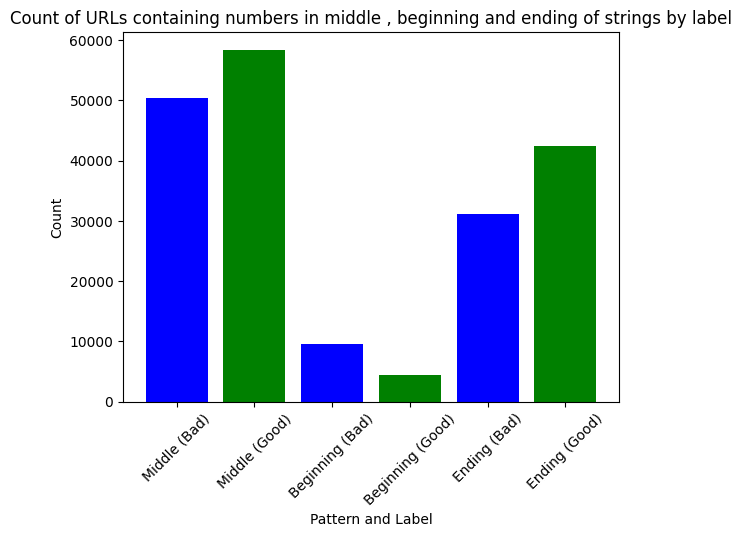

In [34]:
pattern_middle = r'\b[A-Za-z]+\d+[A-Za-z]*\d*[A-Za-z]*\b'
pattern_beginning = r'^\d+[A-Za-z]*\b'
pattern_end = r'\b[A-Za-z]+\d+\b'

# Count the URLs matching the patterns for 'bad' and 'good' labels
count_middle_bad = sum(1 for url, label in zip(df['URL'], df['Label']) if re.search(pattern_middle, url) and label == 'bad')
count_middle_good = sum(1 for url, label in zip(df['URL'], df['Label']) if re.search(pattern_middle, url) and label == 'good')
count_beginning_bad = sum(1 for url, label in zip(df['URL'], df['Label']) if re.search(pattern_beginning, url) and label == 'bad')
count_beginning_good = sum(1 for url, label in zip(df['URL'], df['Label']) if re.search(pattern_beginning, url) and label == 'good')
count_ending_bad = sum(1 for url, label in zip(df['URL'], df['Label']) if re.search(pattern_end, url) and label == 'bad')
count_ending_good = sum(1 for url, label in zip(df['URL'], df['Label']) if re.search(pattern_end, url) and label == 'good')

# Plot the counts using a bar graph
labels = ['Middle (Bad)', 'Middle (Good)', 'Beginning (Bad)', 'Beginning (Good)','Ending (Bad)', 'Ending (Good)' ]
counts = [count_middle_bad, count_middle_good, count_beginning_bad, count_beginning_good, count_ending_bad, count_ending_good]

plt.bar(labels, counts, color=['blue', 'green', 'blue', 'green','blue', 'green'])
plt.xlabel('Pattern and Label')
plt.ylabel('Count')
plt.title('Count of URLs containing numbers in middle , beginning and ending of strings by label')
plt.xticks(rotation=45)
plt.show()

In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer

# Initialize NLTK's regex tokenizer for tokenizing URLs
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
# Initialize Snowball and Lancaster stemmers
snowball_stemmer = SnowballStemmer('english')
# Tokenize URLs, apply stemming, and create new columns
data['Tokens'] = data['URL'].apply(lambda x: tokenizer.tokenize(x))
data['Snowball_Stems'] = data['Tokens'].apply(lambda tokens: [snowball_stemmer.stem(token) for token in tokens])

In [4]:
data['Snowball_Stems_Joined'] = data['Snowball_Stems'].apply(lambda stems: ' '.join(stems))

In [39]:
data.head()

,URL,Label,Tokens,Snowball_Stems,Snowball_Stems_Joined
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


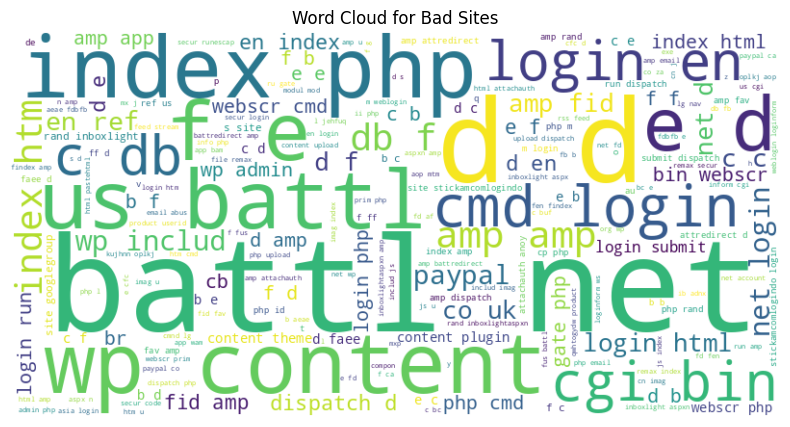

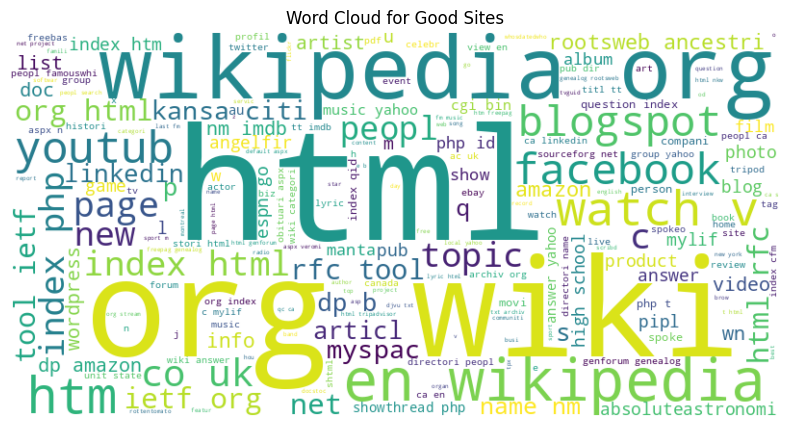

In [41]:
from wordcloud import WordCloud

# Function to generate word cloud for a given category
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filter bad and good sites
bad_sites_text = ' '.join(data[data['Label'] == 'bad']['Snowball_Stems_Joined'])
good_sites_text = ' '.join(data[data['Label'] == 'good']['Snowball_Stems_Joined'])

# Generate word clouds for bad and good sites
generate_wordcloud(bad_sites_text, 'Word Cloud for Bad Sites')
generate_wordcloud(good_sites_text, 'Word Cloud for Good Sites')
